# LSTM Model for Learning Purposes

This notebook demonstrates the use of a **Long Short-Term Memory (LSTM)** model for a basic text processing task. The model is created for **learning purposes** and **educational demonstrations**, not for achieving high-level performance or production deployment.

## Model Overview

- **Task**: The model is built to perform Next Word Predictor.
- **Model**: The model architecture consists of an **Embedding** layer, followed by an **LSTM** layer, and a **Dense** output layer with a **softmax** activation.
- **Dataset**: The dataset is small and may not be suitable for training a high-quality model. The model is more focused on demonstrating the basic structure and flow of working with LSTM networks.

## Key Observations

- **Overfitting**: As expected with small datasets, the model shows signs of **overfitting** where the training accuracy is much higher than the validation accuracy. The model performs well on the training set but struggles to generalize to the validation set.
  
- **Validation Accuracy**: The validation accuracy is low, and the validation loss is high, which is expected due to the small dataset and limited data diversity.

## Important Notes

- **Learning Focus**: This notebook is intended for beginners who are learning about LSTM networks and the Keras/TensorFlow API. The goal is to understand how to build, compile, and train an LSTM model for sequential data tasks.
  
- **Not for Production**: This model is **not optimized** for production use or real-world applications. The model architecture, hyperparameters, and training process can be adjusted and improved further when working with larger and more balanced datasets.

- **Data Size**: The size of the data used is small, and more data would be needed to achieve better performance and generalization.

- **Next Steps**: Once you are comfortable with the basics of LSTM networks, you can:
  - Experiment with larger datasets.
  - Try more advanced techniques such as **Bidirectional LSTM**, **attention mechanisms**, or **pre-trained embeddings**.
  - Work on improving model regularization (e.g., adding **Dropout**, **L2 regularization**) to prevent overfitting.
  - Explore hyperparameter tuning and model optimization techniques.

## Conclusion

This notebook serves as a simple introduction to working with LSTM models. It is important to remember that training a high-performing model requires careful data preprocessing, tuning, and experimenting with various architectures, and larger datasets. As a beginner, focus on understanding the basics of model architecture and training cycles before moving on to more complex tasks.

---

Happy learning and experimenting with LSTM models! 🚀


In [76]:
import pandas as pd
import numpy as np

In [127]:
# Load text file
with open("/content/Deep Learning Curriculum.txt", "r") as file:
    text = file.read()



In [128]:
text

'CampusX Deep Learning Curriculum\nA. Artificial Neural Network and how to improve them\n1. Biological Inspiration\n●\n\nUnderstanding the neuron structure\n\n●\n\nSynapses and signal transmission\n\n●\n\nHow biological concepts translate to artificial neurons\n\n2. History of Neural Networks\n●\n\nEarly models (Perceptron)\n\n●\n\nBackpropagation and MLPs\n\n●\n\nThe "AI Winter" and resurgence of neural networks\n\n●\n\nEmergence of deep learning\n\n3. Perceptron and Multilayer Perceptrons (MLP)\n●\n\nSingle-layer perceptron limitations\n\n●\n\nXOR problem and the need for hidden layers\n\n●\n\nMLP architecture\n\n4. Layers and Their Functions\n●\n\nInput Layer\n○\n\n●\n\nHidden Layers\n○\n\n●\n\nAccepting input data\nFeature extraction\n\nOutput Layer\n○\n\nProducing final predictions\n\n5. Activation Functions\n\n\x0c●\n\nSigmoid Function\n○\n\n●\n\nHyperbolic Tangent (tanh)\n○\n\n●\n\nAdvantages in mitigating vanishing gradients\n\nLeaky ReLU and Parametric ReLU\n○\n\n●\n\nComparis

In [79]:
import re

text = re.sub(r'[\u2022\u25CB●]\s*', '', text)

# Optional: Remove extra newlines and spaces that might result from the bullet removal
# text = re.sub(r'\n+', '\n', text)  # Replace multiple newlines with a single newline
# text = text.strip()  # Remove leading and trailing whitespaces


In [80]:
faqs = """About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a session you can go back and watch the recording.
Where can I find the class schedule?
Checkout this google sheet to see month by month time table of the course - https://docs.google.com/spreadsheets/d/16OoTax_A6ORAeCg4emgexhqqPv3noQPYKU7RJ6ArOzk/edit?usp=sharing.
What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.
What is the language spoken by the instructor during the sessions?
Hinglish
How will I be informed about the upcoming class?
You will get a mail from our side before every paid session once you become a paid user.
Can I do this course if I am from a non-tech background?
Yes, absolutely.
I am late, can I join the program in the middle?
Absolutely, you can join the program anytime.
If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you make the payment you will be able to see all the past content in your dashboard.
Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.
Will we do case studies in the program?
Yes.
Where can we contact you?
You can mail us at nitish.campusx@gmail.com
Payment/Registration related questions
Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/
Can we pay the entire amount of Rs 5600 all at once?
Unfortunately no, the program follows a monthly subscription model.
What is the validity of monthly subscription? Suppose if I pay on 15th Jan, then do I have to pay again on 1st Feb or 15th Feb
15th Feb. The validity period is 30 days from the day you make the payment. So essentially you can join anytime you don’t have to wait for a month to end.
What if I don’t like the course after making the payment. What is the refund policy?
You get a 7 days refund period from the day you have made the payment.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmail.com
Post registration queries
Till when can I view the paid videos on the website?
This one is tricky, so read carefully. You can watch the videos till your subscription is valid. Suppose you have purchased subscription on 21st Jan, you will be able to watch all the past paid sessions in the period of 21st Jan to 20th Feb. But after 21st Feb you will have to purchase the subscription again.
But once the course is over and you have paid us Rs 5600(or 7 installments of Rs 799) you will be able to watch the paid sessions till Aug 2024.
Why lifetime validity is not provided?
Because of the low course fee.
Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearance session
If I join the program late, can I still ask past week doubts?
Yes, just select past week doubt in the doubt clearance google form.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmai.com
Certificate and Placement Assistance related queries
What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 5600
You have to attempt all the course assessments.
I am joining late. How can I pay payment of the earlier months?
You will get a link to pay fee of earlier months in your dashboard once you pay for the current month.
I have read that Placement assistance is a part of this program. What comes under Placement assistance?
This is to clarify that Placement assistance does not mean Placement guarantee. So we dont guarantee you any jobs or for that matter even interview calls. So if you are planning to join this course just for placements, I am afraid you will be disappointed. Here is what comes under placement assistance
Portfolio Building sessions
Soft skill sessions
Sessions with industry mentors
Discussion on Job hunting strategies
"""

In [129]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [130]:
tokenizer = Tokenizer()

In [131]:
tokenizer.fit_on_texts([text])

In [132]:
len(tokenizer.word_index)

839

In [133]:
input_sequences = []
for sentences in text.split('\n'):
  tokenized_sentence = tokenizer.texts_to_sequences([sentences])[0]
  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [134]:
maxlen = max([len(x) for x in input_sequences])

In [135]:
maxlen

13

In [136]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(input_sequences, maxlen, padding='pre')

In [137]:
padded_sequences

array([[  0,   0,   0, ...,   0, 368,  46],
       [  0,   0,   0, ..., 368,  46,  27],
       [  0,   0,   0, ...,  46,  27, 369],
       ...,
       [  0,   0,   0, ...,  44,  16,  24],
       [  0,   0,   0, ...,  16,  24, 838],
       [  0,   0,   0, ...,  24, 838,  48]], dtype=int32)

In [138]:
X = padded_sequences[:,:-1]
y = padded_sequences[:,-1]

In [139]:
print(X.shape)
print(y.shape)

(1686, 12)
(1686,)


In [140]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=len(tokenizer.word_index)+1)

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Bidirectional



In [142]:
model = Sequential()
# model.add(Embedding(input_dim=(len(tokenizer.word_index)+1,), output_dim=100))
model.add(Embedding(len(tokenizer.word_index)+1, 100, input_shape=(maxlen,)))
model.add(Dropout(0.5))  # Dropout layer
model.add(Bidirectional(LSTM(200))) # Added return_sequences=True
model.add(Dropout(0.5))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [143]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [144]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 13, 100)             │          84,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 13, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 400)                 │         481,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 840)                 │         336,840 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 902,440 (3.44 MB)

 Trainable params: 902,440 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

In [145]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)

In [146]:
history = model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.0166 - loss: 6.6166 - val_accuracy: 0.0118 - val_loss: 6.5587
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0313 - loss: 5.8853 - val_accuracy: 0.0296 - val_loss: 6.6933
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0356 - loss: 5.7959 - val_accuracy: 0.0178 - val_loss: 6.9121
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0447 - loss: 5.7753 - val_accuracy: 0.0296 - val_loss: 6.9027
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0364 - loss: 5.7336 - val_accuracy: 0.0296 - val_loss: 7.0153
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0319 - loss: 5.6451 - val_accuracy: 0.0089 - val_loss: 7.4012
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0370 - loss: 5.5770 - val_accuracy: 0.0148 - val_loss: 7.3293
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0423 - loss: 5.4686 - val_accuracy: 0.

In [147]:
import matplotlib.pyplot as plt

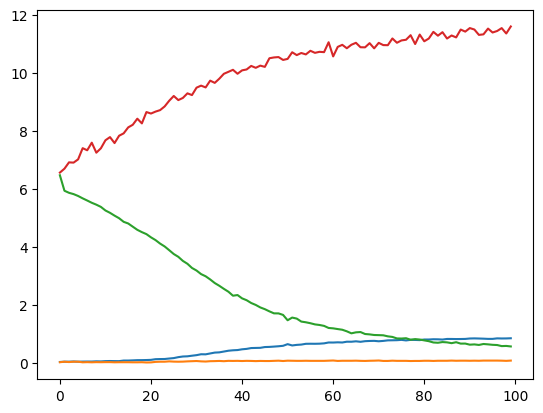

In [148]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [150]:
import time
text = "lstm"

for i in range(10):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=56, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
lstm analysis
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
lstm analysis or
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
lstm analysis or networks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
lstm analysis or networks techniques
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
lstm analysis or networks techniques to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
lstm analysis or networks techniques to overcome
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
lstm analysis or networks techniques to overcome neurons
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
lstm analysis or networks techniques to overcome neurons gated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
lstm analysis or networks techniques to overcome neurons gated the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
lstm analysis or networks techniques to overcome neurons gated the units
